# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "first_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-minimal.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
FS: Skipping neuron because, num_neurons =0
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
ChIN: Skipping neuron because, num_neurons =0
LTS: Skipping neuron because, num_neurons =0
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing first_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: first_lateral
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
Generating 18630 points for first_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 17717, previous close_pairs = 37343
n_points = 16851, previous close_pairs = 30712
n_points = 16031, previous close_pairs = 25524
n_points = 15256, previous close_pairs = 21315
n_points = 14525, previous close_pairs = 17775
n_points = 13836, previous close_pairs = 14976
n_points = 13191, previous close_pairs = 12443
n_points = 12591, previous close_pairs = 10516
n_points = 12035, previous close_pairs = 8834
n_points = 11525, previous close_pairs = 7293
n_points = 11060, previous close_pairs = 6201
n_points = 10637, previous close_pairs = 5311
n_points = 10255, previous close_pairs = 4517
n_points = 9915, previous close_pairs = 3793
n_points = 9616, previous close_pairs = 3159
n_points = 9579, previous close_pairs = 2604
n_points = 7049, previous

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


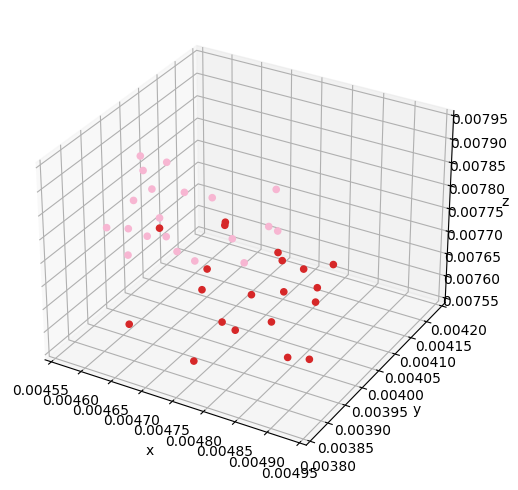

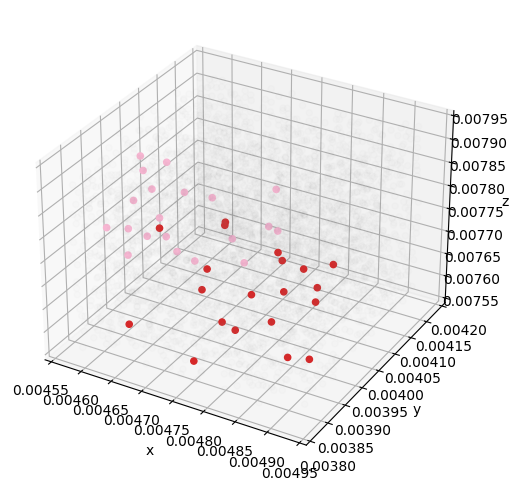

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2024-02-28 11:35:09.411 [IPClusterStart] Starting ipcluster with [daemonize=False]
2024-02-28 11:35:09.652 [IPController] Hub listening on tcp://127.0.0.1:52609 for registration.
2024-02-28 11:35:09.653 [IPController] Hub using DB backend: DictDB
2024-02-28 11:35:09.906 [IPController] hub::created hub
2024-02-28 11:35:09.907 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2024-02-28 11:35:09.907 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2024-02-28 11:35:09.907 [IPController] task::using Python leastload Task scheduler
2024-02-28 11:35:09.916 [IPController] Heartmonitor beating every 3000ms
2024-02-28 11:35:09.916 [broadcast-0] BroadcastScheduler 0 started
2024-02-28 11:35:09.916 [task] Task scheduler started [leastload]
2024-02-28 11:35:09.917 [broadcast

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.detect_synapses(parallel=True)

Touch detection
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
importing SnuddaDetect from snudda.detect.detect on engine(s)

2024-02-28 11:35:29.228 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2024-02-28 11:35:29.228 [IPController] client::client [b'\x00k\x8bEk'] connected
2024-02-28 11:35:29.390 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_4
2024-02-28 11:35:29.391 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_5
2024-02-28 11:35:29.392 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_8
2024-02-28 11:35:29.390 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_2
2024-02-28 11:35:29.390 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_1
2024-02-28 11:35:29.399 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_7
2024-02-28 11:35:29.391 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_6
2024-02-28 11:35:29.390 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da0

2-28 11:35:29.401 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_8' to 7
2024-02-28 11:35:29.390 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_3
2024-02-28 11:35:31.112 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 11:35:31.125 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_7' completed on 6
2024-02-28 11:35:31.198 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 11:35:31.200 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 11:35:31.213 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_1' completed on 0
2024-02-28 11:35:31.214 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_2' completed on 1
2024-02-28 11:35:31.320 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-28 11:35:31.331 [IPController] queue::request '96f6c003-da08d0d1

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2024-02-28 11:35:41.429 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_116
2024-02-28 11:35:41.439 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_124
2024-02-28 11:35:41.429 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_114
2024-02-28 11:35:41.439 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_122
2024-02-28 11:35:41.431 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_120
2024-02-28 11:35:41.435 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_117
2024-02-28 11:35:41.439 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_125
2024-02-28 11:35:41.428 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_113
2024-02-28 11:35:41.439 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_121
2024-02-28 11:35:41.428 [IPEngine] Handling apply_reques

Suppressing printouts for hyper voxels that complete in < 100 seconds.


2024-02-28 11:35:59.586 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_233
2024-02-28 11:35:59.600 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_234
2024-02-28 11:35:59.605 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_235
2024-02-28 11:35:59.579 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_232' completed on 7
2024-02-28 11:35:59.585 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_233' to 7
2024-02-28 11:35:59.589 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_233' completed on 7
2024-02-28 11:35:59.597 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_234' to 7
2024-02-28 11:35:59.601 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_235' to 7
2024-02-28 11:35:59.60

HyperID 86 completed - 20690063 synapses found (210.4 s)


2024-02-28 11:39:11.886 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_225' completed on 0
2024-02-28 11:39:11.902 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_511' to 0
2024-02-28 11:39:11.904 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_511' completed on 0
2024-02-28 11:39:11.902 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_511
2024-02-28 11:39:11.909 [IPEngine] Handling apply_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_512
2024-02-28 11:39:11.908 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_512' to 0
2024-02-28 11:39:11.910 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_512' completed on 0
2024-02-28 11:39:12.050 [IPEngine] Handling execute_request: 96f6c003-da08d0d1b1fd39f5d521c86a_269395_520
2024-02-28 11:39:12.057 [IPEngine] Handling execut

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json


2024-02-28 11:39:12.047 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_513' to 0
2024-02-28 11:39:12.048 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_514' to 1
2024-02-28 11:39:12.048 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_515' to 2
2024-02-28 11:39:12.049 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_516' to 3
2024-02-28 11:39:12.050 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_517' to 4
2024-02-28 11:39:12.050 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_518' to 5
2024-02-28 11:39:12.051 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_51

stop_parallel disabled, to keep pool running.

Execution time: 244.9s


2024-02-28 11:39:12.511 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_520' completed on 7
2024-02-28 11:39:12.594 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2024-02-28 11:39:12.514 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_519' completed on 6
2024-02-28 11:39:12.515 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_518' completed on 5
2024-02-28 11:39:12.518 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_517' completed on 4
2024-02-28 11:39:12.594 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_513' completed on 0
2024-02-28 11:39:12.596 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_516' completed on 3
2024-02-28 11:39:12.598 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_514' completed on 1


(<snudda.detect.detect.SnuddaDetect at 0xffff423a1cd0>,
 <snudda.detect.project.SnuddaProject at 0xffff364703a0>)

In [7]:
sn.prune_synapses(parallel=True)

Prune synapses
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file first_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2024-02-28 11:39:12.617 [IPController] queue::request '96f6c003-da08d0d1b1fd39f5d521c86a_269395_515' completed on 2
2024-02-28 11:39:12.630 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2024-02-28 11:39:12.630 [IPController] client::client [b'\x00k\x8bEl'] connected
2024-02-28 11:39:12.762 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_8
2024-02-28 11:39:12.772 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_16
2024-02-28 11:39:12.782 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_24
2024-02-28 11:39:12.747 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_7
2024-02-28 11:39:12.774 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_15
2024-02-28 11:39:12.781 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_23
2024-02-28 11:39:12.788 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaa

prune_synapses_parallel (2177640/41843042 synapses, 5.2% kept): 45.1s
prune_synapses_parallel (0/0 gap_junctions, 0.0% kept): 0.0s


2024-02-28 11:40:19.226 [IPEngine] WARNING | No heartbeat in the last 3500 ms (1 time(s) in a row).
2024-02-28 11:40:19.356 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_127
2024-02-28 11:40:19.364 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_135
2024-02-28 11:40:19.372 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_143
2024-02-28 11:40:19.381 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_151
2024-02-28 11:40:19.389 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_159
2024-02-28 11:40:19.397 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_167
2024-02-28 11:40:19.354 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_121
2024-02-28 11:40:19.366 [IPEngine] Handling apply_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_129
2024-02-28 11:40:19.372 [IPEngine] Handling apply_request: d0dbbda

stop_parallel disabled, to keep pool running.

Execution time: 311.9s


2024-02-28 11:40:19.554 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_175
2024-02-28 11:40:19.574 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_169
2024-02-28 11:40:19.554 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_173
2024-02-28 11:40:19.554 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_172
2024-02-28 11:40:19.554 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_171
2024-02-28 11:40:19.554 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_170
2024-02-28 11:40:19.571 [IPEngine] Handling execute_request: d0dbbda8-9fca411981e9ecaaaf8951ed_269395_174
2024-02-28 11:40:19.554 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_169' to 0
2024-02-28 11:40:19.554 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request 'd0dbbda8-9fca411981e9

# Reduce network

We have three options.

-- Keep all neurons

-- __Keep only the population unit neurons (We do this here)__

-- Keep only population unit neurons and all neurons connecting to them

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.write_network(out_file_name=modified_network_file)

2024-02-28 11:40:19.641 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_170' completed on 1
2024-02-28 11:40:19.644 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_173' completed on 4
2024-02-28 11:40:19.644 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_176' completed on 7
2024-02-28 11:40:19.644 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_171' completed on 2
2024-02-28 11:40:19.645 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_175' completed on 6
2024-02-28 11:40:19.653 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_172' completed on 3
2024-02-28 11:40:19.654 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_174' completed on 5
2024-02-28 11:40:19.657 [IPController] queue::request 'd0dbbda8-9fca411981e9ecaaaf8951ed_269395_169' completed on 0


Writing to first_lateral/network-synapses-minimal.hdf5
Keeping 40 neurons.
0/2177640 synapses processed
2177640/2177640 synapses processed
Filtering done.
Copying synapses and gap junctions
348 / 348 synapse rows parsed
Synapse matrix written.
Keeping 348 synapses (out of 2177640)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


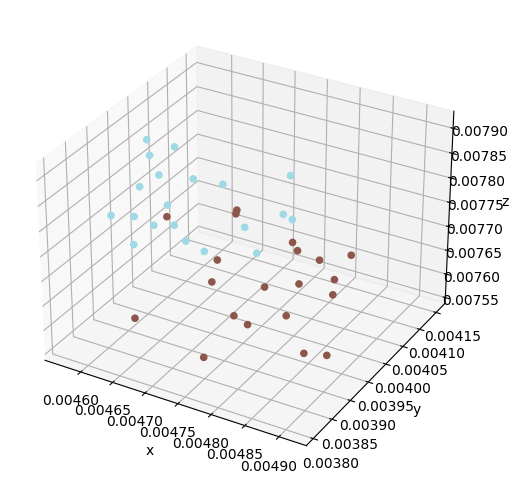

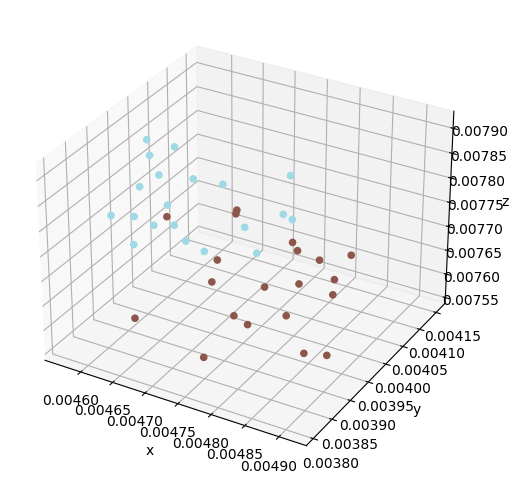

In [9]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [10]:
sn.setup_input(network_file=modified_network_file, input_config="input.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
Writing input spikes to first_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=/home/hjorth/HBP/BasalGangliaData/data from first_lateral/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)


2024-02-28 11:40:20.767 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_5
2024-02-28 11:40:20.784 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_13
2024-02-28 11:40:20.787 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_21
2024-02-28 11:40:20.766 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_1
2024-02-28 11:40:20.784 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_9
2024-02-28 11:40:20.770 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_4
2024-02-28 11:40:20.784 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_12
2024-02-28 11:40:20.786 [IPEngine] Handling apply_request: e4bd89e3-8a5af266e4f929239bc57016_269395_20
2024-02-28 11:40:20.736 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2024-02-28 11:40:20.736 [IPController] client::client [b'\x00k\x8bEm'] connected

Writing spikes to first_lateral/input-spikes.hdf5


2024-02-28 11:40:21.435 [IPController] queue::request 'e4bd89e3-8a5af266e4f929239bc57016_269395_53' completed on 4
2024-02-28 11:40:21.454 [IPController] queue::request 'e4bd89e3-8a5af266e4f929239bc57016_269395_55' completed on 6
2024-02-28 11:40:21.489 [IPController] queue::request 'e4bd89e3-8a5af266e4f929239bc57016_269395_50' completed on 1
2024-02-28 11:40:21.493 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_57' to 0
2024-02-28 11:40:21.493 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_58' to 1
2024-02-28 11:40:21.493 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_59' to 2
2024-02-28 11:40:21.494 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_60' to 3
2024-02-28 11:40:21.494 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted

stop_parallel disabled, to keep pool running.

Execution time: 314.2s


2024-02-28 11:40:21.828 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_73' to 0
2024-02-28 11:40:21.828 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_74' to 1
2024-02-28 11:40:21.828 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_75' to 2
2024-02-28 11:40:21.828 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_76' to 3
2024-02-28 11:40:21.829 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_77' to 4
2024-02-28 11:40:21.829 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_78' to 5
2024-02-28 11:40:21.829 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request 'e4bd89e3-8a5af266e4f929239bc57016_269395_79' to 6

In [11]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2024-02-28 11:40:21.943 [IPController] queue::request 'e4bd89e3-8a5af266e4f929239bc57016_269395_80' completed on 7
2024-02-28 11:40:21.946 [IPController] queue::request 'e4bd89e3-8a5af266e4f929239bc57016_269395_77' completed on 4
2024-02-28 11:40:22.382 [IPClusterStop] Stopping cluster 
2024-02-28 11:40:22.382 [IPClusterStop] Stopping controller
2024-02-28 11:40:22.382 [IPController] CRITICAL | Received signal 15, shutting down
2024-02-28 11:40:22.382 [IPController] CRITICAL | terminating children...
2024-02-28 11:40:22.527 [IPClusterStart] Controller stopped: {'exit_code': 0, 'pid': 269500, 'identifier': 'ipcontroller-269498'}
2024-02-28 11:40:22.527 [IPClusterStart] WARNING | Controller stopped. Shutting down.
2024-02-28 11:40:22.528 [IPClusterStart] ERROR | IPython cluster: stopping
2024-02-28 11:40:22.528 [IPClusterStart] Stopping engine(s): 1709116510
2024-02-28 11:40:22.528 [IPEngine] CRITICAL | received signal 15, stopping
2024-02-28 11:40:22.546 [IPClusterStop] Stopping engine(

0

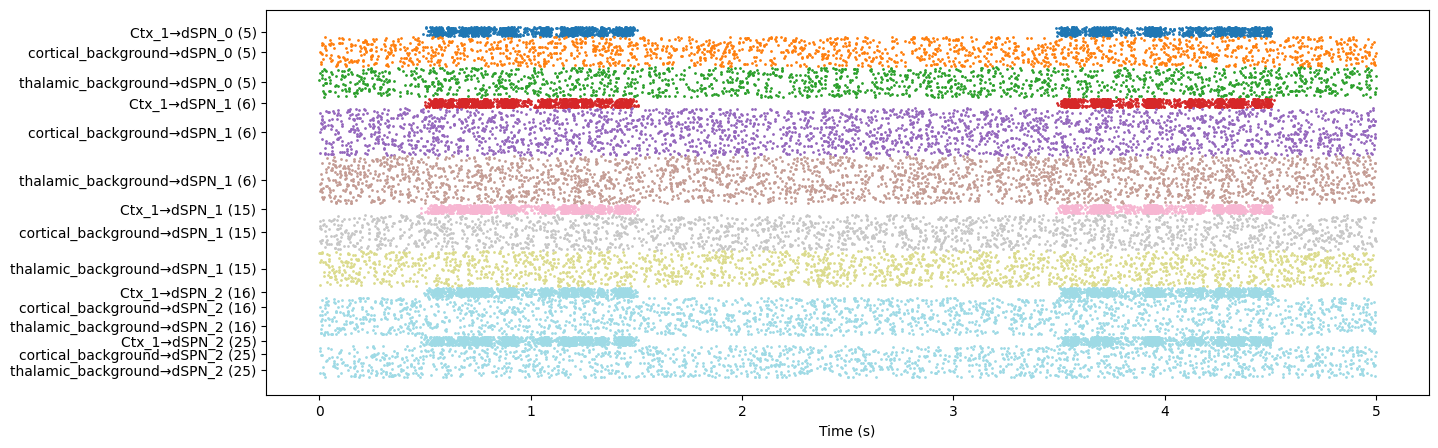

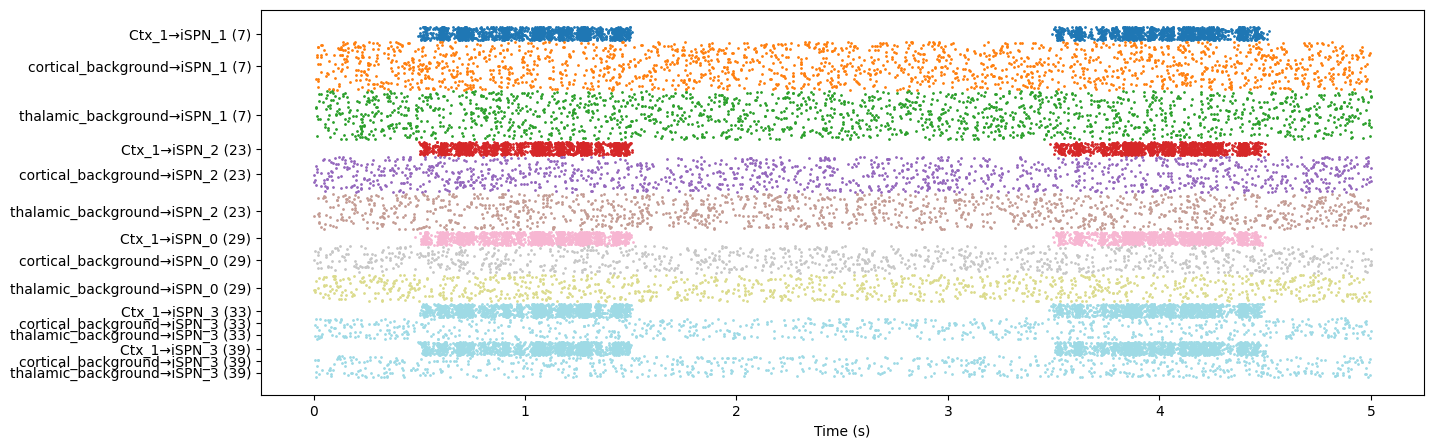

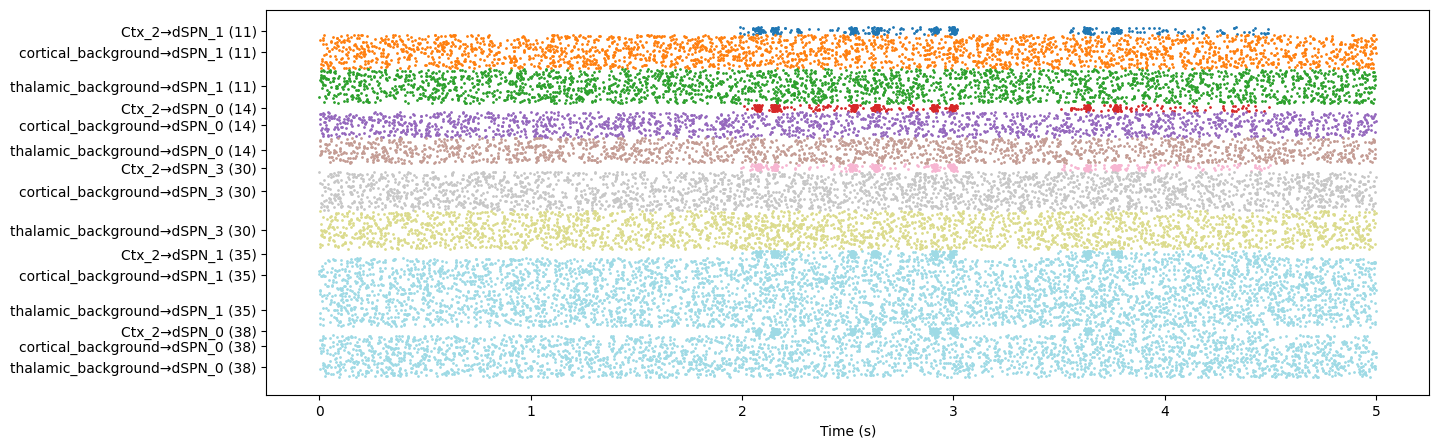

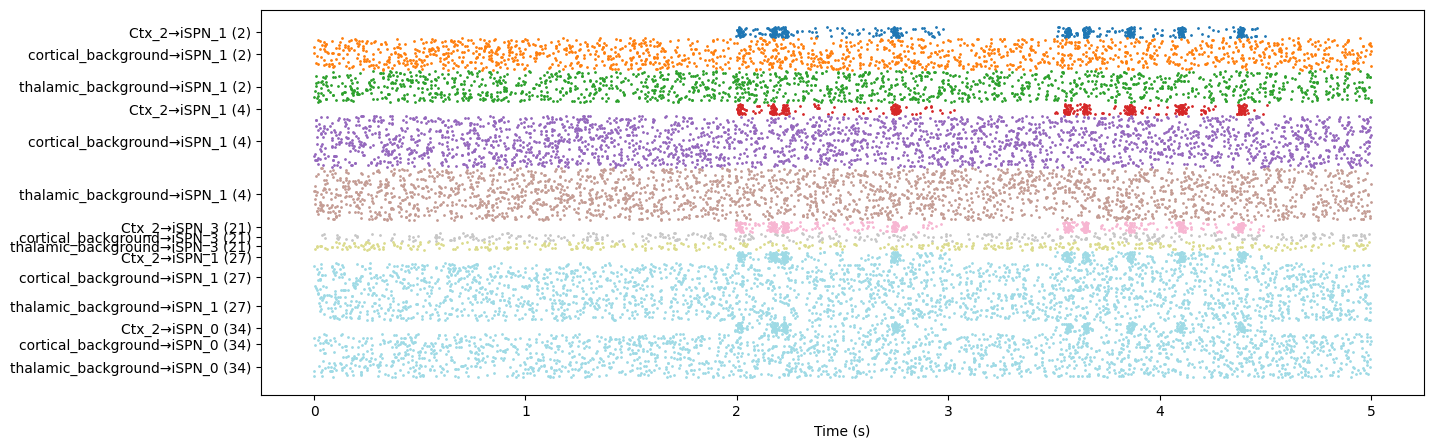

In [12]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [13]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCore

0

Loading first_lateral/simulation/output.hdf5
Saving figure to first_lateral/figures/spike-raster.png


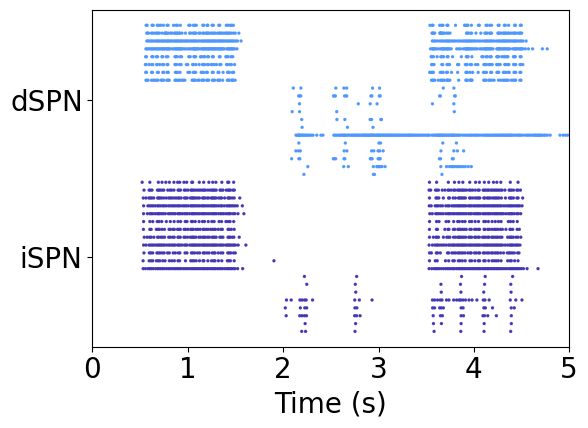

In [14]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure first_lateral/figures/spike-frequency-pop-units1-2.pdf


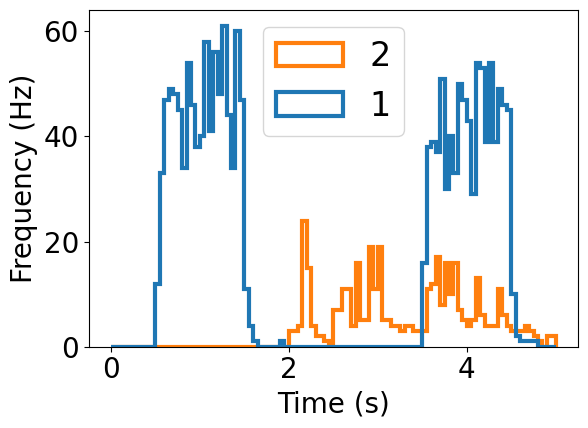

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [15]:
spr.plot_spike_histogram()